In [1]:

import yfinance as yf
import pandas as pd
import os

In [2]:
sp500=yf.Ticker("^GSPC")

In [3]:
sp500=sp500.history(period='max')


In [4]:
sp500


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-12-01 00:00:00-05:00,4559.430176,4599.390137,4554.709961,4594.629883,4397120000,0.0,0.0
2023-12-04 00:00:00-05:00,4564.370117,4572.370117,4546.720215,4569.779785,4369910000,0.0,0.0
2023-12-05 00:00:00-05:00,4557.250000,4578.560059,4551.680176,4567.180176,3909950000,0.0,0.0


<Axes: xlabel='Date'>

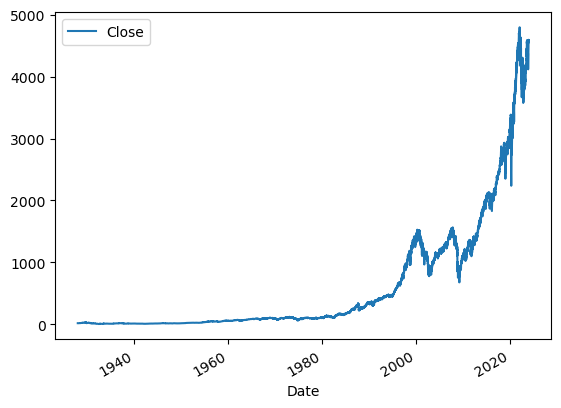

In [5]:
sp500.plot.line(y="Close", use_index=True)

In [6]:
del sp500["Dividends"]
del sp500["Stock Splits"]

In [7]:
sp500["Tomorrow"]=sp500["Close"].shift(-1)
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2023-12-01 00:00:00-05:00,4559.430176,4599.390137,4554.709961,4594.629883,4397120000,4569.779785
2023-12-04 00:00:00-05:00,4564.370117,4572.370117,4546.720215,4569.779785,4369910000,4567.180176
2023-12-05 00:00:00-05:00,4557.250000,4578.560059,4551.680176,4567.180176,3909950000,4549.339844


In [8]:
sp500["Target"]=(sp500["Tomorrow"]>sp500["Close"]).astype(int)

In [9]:
sp500


,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2023-12-01 00:00:00-05:00,4559.430176,4599.390137,4554.709961,4594.629883,4397120000,4569.779785,0
2023-12-04 00:00:00-05:00,4564.370117,4572.370117,4546.720215,4569.779785,4369910000,4567.180176,0
2023-12-05 00:00:00-05:00,4557.250000,4578.560059,4551.680176,4567.180176,3909950000,4549.339844,0


In [10]:
sp500=sp500.loc["1990-01-01":].copy()

In [11]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2023-12-01 00:00:00-05:00,4559.430176,4599.390137,4554.709961,4594.629883,4397120000,4569.779785,0
2023-12-04 00:00:00-05:00,4564.370117,4572.370117,4546.720215,4569.779785,4369910000,4567.180176,0
2023-12-05 00:00:00-05:00,4557.250000,4578.560059,4551.680176,4567.180176,3909950000,4549.339844,0


In [12]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100,min_samples_split=100,random_state=1)
train=sp500.iloc[:-100]
test=sp500.iloc[-100:]
predictors =["Close","Volume","Open","High","Low"]
model.fit(train[predictors],train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [13]:
from sklearn.metrics import precision_score
preds=model.predict(test[predictors])

In [14]:
import pandas as pd
preds=pd.Series(preds,index=test.index)

In [15]:
precision_score(test["Target"],preds)

0.475

<Axes: xlabel='Date'>

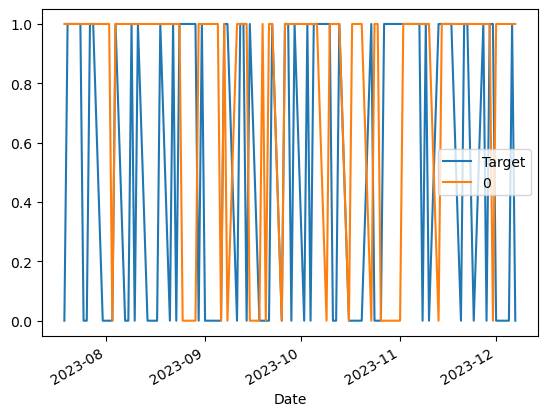

In [16]:
combined=pd.concat([test["Target"],preds],axis=1)
combined.plot()

In [17]:
def predict(train,test,predictors,model):
    model.fit(train[predictors],train["Target"])
    preds= model.predict(test[predictors])
    preds=pd.Series(preds,index=test.index, name="Predictions")
    combined=pd.concat([test["Target"],preds], axis=1)
    return combined

In [18]:
def backtest(data,model,predictors,start=2500,step=250):
    all_predictions=[]
    for i in range(start,data.shape[0],step):
        train=data.iloc[0:i].copy()
        test=data.iloc[i:(i+step)].copy()
        predictions =predict(train,test,predictors,model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [19]:
predictions = backtest(sp500,model,predictors)

In [20]:
predictions["Predictions"].value_counts()

0    3457
1    2593
Name: Predictions, dtype: int64

In [21]:
precision_score(predictions["Target"],predictions["Predictions"])

0.5283455456999614

In [22]:
horizons=[2,5,60,250,1000]
new_predictors=[]
for horizon in horizons:
    rolling_averages=sp500.rolling(horizon).mean()
    ratio_column=f"Close_Ratio_{horizon}"
    sp500[ratio_column]=sp500["Close"]/rolling_averages["Close"]
    
    trend_column=f"Trend_{horizon}"
    sp500[trend_column]=sp500.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors +=[ratio_column, trend_column]

In [23]:
sp500


,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.995675,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.995098,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.002252,1.0,0.993731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-01 00:00:00-05:00,4559.430176,4599.390137,4554.709961,4594.629883,4397120000,4569.779785,0,1.002928,2.0,1.006785,3.0,1.050459,35.0,1.087911,131.0,1.165179,530.0
2023-12-04 00:00:00-05:00,4564.370117,4572.370117,4546.720215,4569.779785,4369910000,4567.180176,0,0.997288,1.0,1.000491,3.0,1.044331,34.0,1.081442,131.0,1.158465,529.0
2023-12-05 00:00:00-05:00,4557.250000,4578.560059,4551.680176,4567.180176,3909950000,4549.339844,0,0.999715,0.0,0.999384,2.0,1.043420,33.0,1.080187,131.0,1.157396,528.0


In [24]:
sp500=sp500.dropna()

In [25]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-30 00:00:00-05:00,4554.870117,4569.890137,4537.240234,4567.799805,5399300000,4594.629883,1,1.001888,1.0,1.002456,3.0,1.044897,34.0,1.082094,130.0,1.158802,530.0
2023-12-01 00:00:00-05:00,4559.430176,4599.390137,4554.709961,4594.629883,4397120000,4569.779785,0,1.002928,2.0,1.006785,3.0,1.050459,35.0,1.087911,131.0,1.165179,530.0
2023-12-04 00:00:00-05:00,4564.370117,4572.370117,4546.720215,4569.779785,4369910000,4567.180176,0,0.997288,1.0,1.000491,3.0,1.044331,34.0,1.081442,131.0,1.158465,529.0


In [26]:
model=RandomForestClassifier(n_estimators=200,min_samples_split=50,random_state=1)

In [27]:
def predict(train,test,predictors,model):
    model.fit(train[predictors],train["Target"])
    preds= model.predict_proba(test[predictors])[:,1]
    preds[preds>=.6]=1
    preds[preds<.6]=0
    preds=pd.Series(preds,index=test.index, name="Predictions")
    combined=pd.concat([test["Target"],preds], axis=1)
    return combined

In [28]:
predictions = backtest(sp500,model,new_predictors)

In [30]:
predictions["Predictions"].value_counts()

0.0    4219
1.0     830
Name: Predictions, dtype: int64

In [31]:
precision_score(predictions["Target"],predictions["Predictions"])

0.572289156626506

In [ ]:
#foreign indices, news articles, key stocks